In [8]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life of 3.052 minutes. Suppose we start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

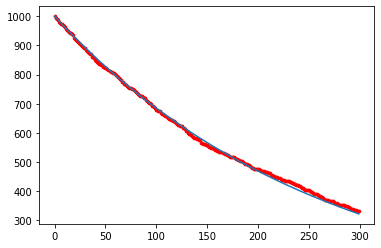

In [67]:
#fissato t p(t) è un numero che rappresenta la probabilità che un particolare nucleo decada. Questo significa che per ogni istante di tempo fissato un nucleo abbiamo un esperimento che ha solo due possibili esiti (decade/non decade) con probabilità p e 1-p (rispettivamente); in particolare si tratta di un Bernoulli trial, e di conseguenza per generare i numeri di nuclei decaduti ci basta utilizzare la distribuzione di Bernoulli di scipy.stats

half_life = 3.052*60 #emivita in secondi
#tau = half_life/np.log(2) #vita media in secondi
tau = half_life
#lam = 1/tau #lambda è una reserved keyword
lam = np.log(2)/half_life
N_0 = 1000 #Numero totale di nuclei
N = N_0

def p(t,tau) :
    return 1-2**(-t/tau)

ax = plt.axes();
#plt.figure()

T = 300 #tempo di osservazione in secondi
x = np.zeros((T,))

for t in np.arange(T) :
    #ax.scatter(t,N,c="blue")
    #N -= sps.binom.rvs(n=N,p=p(t,tau))
    x[t] = N
    N -= sps.binom.rvs(n=N,p=lam) #sarebbe lambda*1 secondo. 
    #ax.scatter(t,N,c="blue")
    #plt.scatter(t,N,c="blue")

time = np.arange(T)
y = N_0*2**(-time/half_life)
ax.scatter(time,x,c="red",s=7)
ax.plot(time,y,);

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [104]:
from scipy.integrate import quad

N_points = 10000

def f(x) :
    return (np.sin(1/(x*(2-x))))**2

#il rettangolo [0,2]x[0,1] dovrebbe bastare in quanto f(x)<=1
#hit or miss:
x = 2*np.random.rand(N_points) #x in [0,2]
y = np.random.rand(N_points) #y in [0,1]
A_hm = 2*np.count_nonzero(y < f(x))/N_points
A_exact = quad(f,0,2)[0]
print("area with hit or miss MC:",A_hm)
print("exact result:",A_exact)
print(f"percent error: {100*np.abs(A_hm-A_exact)/A_exact}")
A_mean = 2*np.mean(f(x))
print("\n")
print("area with mean MC:",A_mean)
print("exact result:",A_exact)
print(f"percent error: {100*np.abs(A_mean-A_exact)/A_exact}")

area with hit or miss MC: 1.4472
exact result: 1.4516877509810684
percent error: 0.3091402388726827


area with mean MC: 1.450534613271006
exact result: 1.4516877509810684
percent error: 0.07943427980866542


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



2D area: 3.1608


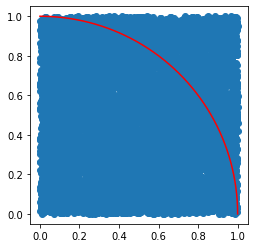

In [83]:
#2D: la prima colonna rappresenta le x dei punti, la seconda le y
N_points = 10000

M_2d = np.random.rand(N_points,2)#attenzione che così genero solo numeri con coordinate comprese fra 0 e 1, cioè prendo solo il prino quadrante --> un quarto del risultato cercato!
norms_2d = np.linalg.norm(M_2d,axis=1)#l'area del quadrato [0,1]x[0,1] è unitaria quindi non devo preoccuparmi di moltiplicare per essa

A = 4*np.count_nonzero(norms_2d <= 1)/N_points #posso rendere il tutto più compatto come nella cella seguente, ma intanto faccio un plot qui
print("2D area:",A)

#plot
theta = np.linspace(0,np.pi/2,1000)
plt.plot(np.cos(theta),np.sin(theta),c="red");
plt.scatter(M_2d[:,0],M_2d[:,1]);
plt.axis("scaled");

In [98]:
N_points = 100000
#2D
A = 4*np.count_nonzero(np.linalg.norm(np.random.rand(N_points,2),axis=1) <= 1)/N_points
print("2D area:",A)

#il comando precedente si generalizza facilmente a 10 dimensioni; aggiungo altre 8 colonne in modo che le 10 colonne rappresentino le 10 coordinate dei vari punti, e calcolando le norme lungo le righe ottengo i valori relativi a ciascun punto. Adesso però per semplicità è meglio generare i numeri in modo che ogni x_i sia fra -1 e 1, in modo da riprodurre direttamente l'ipercubo di lato 2 centrato sull'origine e allineato agli assi (se non altro per non doversi preoccupare per quale fattore moltiplicare)
vol = 2**10*np.count_nonzero(np.linalg.norm((2*np.random.rand(N_points,10)-1),axis=1) <= 1)/N_points #devo moltiplicare per l'ipervolume del cubo di lato 2 considerato
print("10D hypervolume:",vol) #in generale il volume di un ipercubo di lato l in n dimensioni è l^n

from scipy.special import gamma
print("exact result for a 10D sphere:",np.pi**5/gamma(6)) #https://en.wikipedia.org/wiki/Volume_of_an_n-ball

2D area: 3.14712
10D hypervolume: 2.70336
exact result for a 10D sphere: 2.550164039877345


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [124]:
#il nostro integrale sarà dato dalla media di f(x)/w(x) per l'integrale di w(x). Scambio f con g per evitare confusione

N_points = 10000

def g(x) :
    return 1/(np.sqrt(x)*(np.exp(x)+1))

def w(x) :
    return 1/np.sqrt(x)

x = np.random.rand(N_points) #x in [0,1]
A_w = np.mean(g(x)/w(x))*2 #*quad(w,0,1)[0] #il risultato esatto si calcola subito come 2*sqrt(x)|_0^1
print("Area with importance sampling MC:",A_w)
print("exact result:",quad(g,0,1)[0])

Area with importance sampling MC: 0.7611662568926687
exact result: 0.8389329600133858
